## Task 5. Improving Employee Retention by Predicting Employee Attrition Using Machine Learning-Copy1

In [ ]:
# importing libraries yang dibutuhkan
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#import csv dari lokal komputer (file csv)
df = pd.read_csv('/content/sample_data/Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.csv')
df.sample(5)

Username  EnterpriseID StatusPernikahan JenisKelamin  \
191      obsessedCake8        101666          Lainnya       Wanita   
0    spiritedPorpoise3        111065    Belum_menikah         Pria   
171      jumpyBasmati9        111220    Belum_menikah         Pria   
250      jubilantTeal7        106547          Lainnya         Pria   
146    ferventAbalone7        105357    Belum_menikah       Wanita   

    StatusKepegawaian                     Pekerjaan           JenjangKarir  \
191          FullTime                 Data Engineer              Mid_level   
0           Outsource  Software Engineer (Back End)  Freshgraduate_program   
171        Internship               Product Manager  Freshgraduate_program   
250          FullTime               DevOps Engineer  Freshgraduate_program   
146          FullTime      Product Design (UI & UX)           Senior_level   

    PerformancePegawai     AsalDaerah     HiringPlatform  ...         NomorHP  \
191       Sangat_bagus  Jakarta Utara             Indeed  ...  +6281290438xxx   
0         Sangat_bagus  Jakarta Timur  Employee_Referral  ...  +6282232522xxx   
171       Sangat_bagus  Jakarta Pusat           LinkedIn  ...  +6289878705xxx   
250              Bagus  Jakarta Barat  Employee_Referral  ...  +6287898271xxx   
146              Bagus  Jakarta Timur  Employee_Referral  ...  +6282250643xxx   

                              Email  TingkatPendidikan  PernahBekerja  \
191      obsessedCake8683@yahoo.com           Magister              1   
0    spiritedPorpoise3135@yahoo.com           Magister              1   
171     jumpyBasmati9859@proton.com            Sarjana              1   
250    jubilantTeal7049@hotmail.com           Magister              1   
146   ferventAbalone7081@proton.com            Sarjana              1   

     IkutProgramLOP     AlasanResign TanggalLahir TanggalHiring  \
191             NaN  kejelasan_karir   1965-05-07     2014-9-29   
0               1.0    masih_bekerja   1972-07-01    2011-01-10   
171             0.0       leadership   1985-06-29     2011-8-15   
250             NaN              NaN   1970-02-08    2015-01-05   
146             NaN    tidak_bahagia   1966-04-17     2016-7-21   

    TanggalPenilaianKaryawan  TanggalResign  
191                2020-1-28     2017-11-15  
0                  2016-2-15              -  
171                2014-1-14      2018-9-15  
250                2020-1-14              -  
146                2020-1-14     2018-04-01  

[5 rows x 25 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [ ]:
df.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

 Terdapat Missing Values pada fitur ['SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran, 'IkutProgramLOP', 'AlasanResign']

In [ ]:
df.describe()

EnterpriseID  SkorSurveyEngagement  SkorKepuasanPegawai  \
count     287.000000            287.000000           282.000000   
mean   105923.324042              3.101045             3.904255   
std      4044.977599              0.836388             0.913355   
min    100282.000000              1.000000             1.000000   
25%    101269.000000              3.000000             3.000000   
50%    106069.000000              3.000000             4.000000   
75%    110514.500000              4.000000             5.000000   
max    111703.000000              5.000000             5.000000   

       JumlahKeikutsertaanProjek  JumlahKeterlambatanSebulanTerakhir  \
count                 284.000000                          286.000000   
mean                    1.179577                            0.412587   
std                     2.294441                            1.275016   
min                     0.000000                            0.000000   
25%                     0.000000                            0.000000   
50%                     0.000000                            0.000000   
75%                     0.000000                            0.000000   
max                     8.000000                            6.000000   

       JumlahKetidakhadiran  IkutProgramLOP  
count            281.000000       29.000000  
mean              10.448399        0.517241  
std                6.902252        0.508548  
min                1.000000        0.000000  
25%                5.000000        0.000000  
50%               10.000000        1.000000  
75%               15.000000        1.000000  
max               55.000000        1.000000

# Data Cleansing

In [ ]:
#Mengisi nilai Null Value menggunakan nilai mean
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].mean(), inplace=True)
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].mean(), inplace=True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].mean(), inplace=True)
df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].mean(), inplace=True)

In [ ]:
# Mengisi missing value menggunakan data yang paling sering muncul
df['AlasanResign'].fillna(df['AlasanResign'].mode()[0], inplace=True)

In [ ]:
df.drop(columns=['IkutProgramLOP'], inplace=True)

In [ ]:
df.isna().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
dtype: int64

In [ ]:
# Ganti nilai 'yes' menjadi 1
df['PernahBekerja'] = df['PernahBekerja'].replace('yes','1')

In [ ]:
#Melihat nilai Unique dalam tiap kolom
for col in df.columns:
    print("{} have {} unique values: {}".format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64' or df[col].dtypes == 'object':
        print("{} values: {}".format(col,df[col].unique()))
        print('-' * 100)

Username have 285 unique values: object
Username values: ['spiritedPorpoise3' 'jealousGelding2' 'pluckyMuesli3' 'stressedTruffle1'
 'shyTermite7' 'emptyMacaw4' 'madZebra1' 'cynicalMandrill7' 'lyingMussel8'
 'enviousMoth4' 'puzzledCake4' 'grizzledSnipe7' 'yearningBagels0'
 'sheepishSheep9' 'madWildfowl7' 'enviousSalami4' 'pacifiedRaisins7'
 'wrathfulMagpie6' 'hushedSeahorse7' 'guiltyMoth4' 'peacefulCoati5'
 'dejectedPolenta7' 'needfulLeopard2' 'offendedIguana0' 'pluckyHoopoe3'
 'needySyrup4' 'forsakenOwl1' 'pluckyApples4' 'guiltySnail8'
 'grizzledFlamingo9' 'worriedSyrup7' 'somberBoars0' 'giddyMallard9'
 'madFerret4' 'mereCaribou1' 'decimalAbalone6' 'blissfulMussel3'
 'ardentLapwing0' 'peskyTeal7' 'blissfulHyena1' 'solidMacaw1'
 'cautiousPolenta9' 'excludedPorpoise4' 'shamefulIguana0' 'shySyrup7'
 'forsakenCow7' 'grumpyFish4' 'wingedPorpoise5' 'soreCaribou0'
 'needfulCardinal0' 'giddyCheetah9' 'hushedOil9' 'crummyPudding5'
 'selfishBasmati2' 'adoringCardinal9' 'importedApricots7' 'grizz

In [ ]:
df.drop(columns = ['PernahBekerja'], inplace=True)

In [ ]:
df.isna().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# Annual Report On Employee Number Changes

In [ ]:
df_new = df.copy()

In [ ]:
# Mengonversi tanggal hiring dan resign menjadi tahun
df_new['TahunHiring'] = pd.to_datetime(df_new['TanggalHiring'], errors='coerce').dt.year
df_new['TahunResign'] = pd.to_datetime(df_new['TanggalResign'], errors='coerce').dt.year

In [ ]:
# Menghitung jumlah karyawan yang masuk berdasarkan tahun hiring
jumlah_masuk = df_new.groupby('TahunHiring').size().reset_index(name='JumlahMasuk')

# Menghitung jumlah karyawan yang keluar berdasarkan tahun resign
jumlah_keluar = df_new.groupby('TahunResign').size().reset_index(name='JumlahKeluar')

In [ ]:
# Menggunakan outer join untuk menggabungkan tabel jumlah karyawan yang masuk dan keluar berdasarkan tahun
gabungan_masuk_keluar = pd.merge(jumlah_masuk, jumlah_keluar, how='outer', left_on='TahunHiring', right_on='TahunResign')

# Mengganti nama kolom untuk kejelasan
gabungan_masuk_keluar = gabungan_masuk_keluar.rename(columns={'TahunHiring': 'Tahun', 'TahunResign': 'TahunResign'})

In [ ]:
# Langkah 3: Melakukan Imputasi pada Data Tahun yang Kosong

# Melakukan imputasi pada data tahun yang kosong
gabungan_masuk_keluar['Tahun'] = gabungan_masuk_keluar['Tahun'].fillna(gabungan_masuk_keluar['TahunResign'])
gabungan_masuk_keluar = gabungan_masuk_keluar.drop(columns=['TahunResign'])

# Mengisi nilai null dengan 0 pada kolom JumlahMasuk dan JumlahKeluar
gabungan_masuk_keluar['JumlahMasuk'] = gabungan_masuk_keluar['JumlahMasuk'].fillna(0).astype(int)
gabungan_masuk_keluar['JumlahKeluar'] = gabungan_masuk_keluar['JumlahKeluar'].fillna(0).astype(int)

# Menampilkan hasil
gabungan_masuk_keluar = gabungan_masuk_keluar.sort_values(by='Tahun').reset_index(drop=True)
gabungan_masuk_keluar

Tahun  JumlahMasuk  JumlahKeluar
0   2006.0            1             0
1   2007.0            2             0
2   2008.0            2             0
3   2009.0            7             0
4   2010.0            8             0
5   2011.0           76             0
6   2012.0           41             0
7   2013.0           43             5
8   2014.0           56            12
9   2015.0           31             8
10  2016.0           14             8
11  2017.0            5            19
12  2018.0            1            26
13  2019.0            0             5
14  2020.0            0             6

In [ ]:
pip install waterfallcharts

  Preparing metadata (setup.py) ... done
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3388 sha256=6cb72ede51cb654e1878b1ffbe0a1f7d0b1b0f9f38a95227ca7cf50d952c4ce5
  Stored in directory: /root/.cache/pip/wheels/bd/34/6c/58fce34a3b8ec5607aff650db14ceb41db8223ac217423371b
Successfully built waterfallcharts


In [ ]:
import waterfall_chart

# Menghitung total karyawan yang resign setiap tahunnya
gabungan_masuk_keluar['TotalResign'] = gabungan_masuk_keluar['JumlahKeluar'].cumsum()

# Menghitung total karyawan yang masih bertahan setiap tahunnya
gabungan_masuk_keluar['TotalMasuk'] = gabungan_masuk_keluar['JumlahMasuk'].cumsum()

# Menghitung total karyawan yang masih bertahan setiap tahunnya (dengan mengurangkan total resign)
gabungan_masuk_keluar['TotalBertahan'] = gabungan_masuk_keluar['TotalMasuk'] - gabungan_masuk_keluar['TotalResign']

# Menghitung perubahan jumlah karyawan setiap tahunnya
gabungan_masuk_keluar['Perubahan'] = gabungan_masuk_keluar['TotalBertahan'].diff().fillna(gabungan_masuk_keluar['TotalBertahan'])


<Figure size 3000x2000 with 0 Axes>

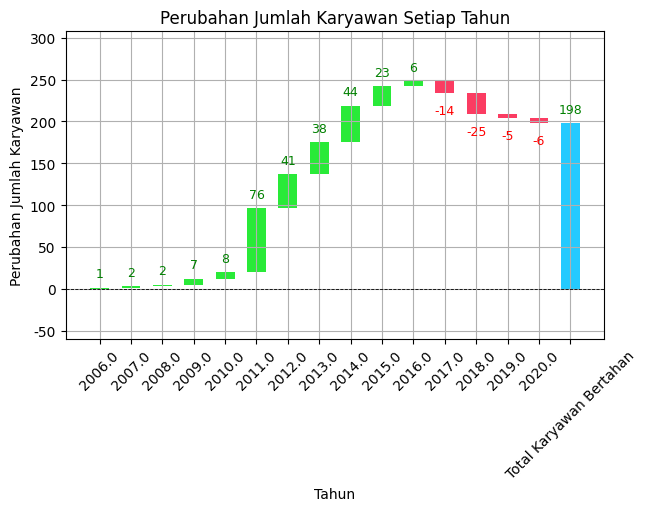

Tahun  TotalMasuk  TotalResign  TotalBertahan  Perubahan
0   2006.0           1            0              1        1.0
1   2007.0           3            0              3        2.0
2   2008.0           5            0              5        2.0
3   2009.0          12            0             12        7.0
4   2010.0          20            0             20        8.0
5   2011.0          96            0             96       76.0
6   2012.0         137            0            137       41.0
7   2013.0         180            5            175       38.0
8   2014.0         236           17            219       44.0
9   2015.0         267           25            242       23.0
10  2016.0         281           33            248        6.0
11  2017.0         286           52            234      -14.0
12  2018.0         287           78            209      -25.0
13  2019.0         287           83            204       -5.0
14  2020.0         287           89            198       -6.0

In [ ]:
# Membuat Plot untuk Menunjukkan Perubahan Kenaikan dan Penurunan Setiap Tahun

# Data yang akan digunakan untuk waterfall chart
data = gabungan_masuk_keluar[['Tahun', 'Perubahan']]

# Mengonversi tahun dan perubahan ke list untuk plot
tahun = data['Tahun'].tolist()
perubahan = data['Perubahan'].tolist()

# Menyediakan data untuk plot
waterfall_data = list(zip(tahun, perubahan))

# Membuat plot waterfall chart
plt.figure(figsize=(30, 20))
waterfall_chart.plot(tahun, perubahan, net_label='Total Karyawan Bertahan', rotation_value=45, formatting='{:.0f}')

# Menambahkan judul dan label
plt.title('Perubahan Jumlah Karyawan Setiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Perubahan Jumlah Karyawan')
plt.grid(True)
plt.show()

# Menampilkan hasil perhitungan
gabungan_masuk_keluar[['Tahun', 'TotalMasuk', 'TotalResign', 'TotalBertahan', 'Perubahan']]

# Resign Reason Analysis For Employee Attrition Management Strategy

In [ ]:
# Filter data untuk yang sudah resign dan yang belum resign
resigned_df = df_new[df_new['AlasanResign'] != 'masih_bekerja']
not_resigned_df = df_new[df_new['AlasanResign'] == 'masih_bekerja']

# Agregasi jumlah karyawan berdasarkan pekerjaan dan status resign
resigned_agg = resigned_df.groupby('Pekerjaan').size().reset_index(name='Jumlah_Resign')

not_resigned_agg = not_resigned_df.groupby('Pekerjaan').size().reset_index(name='Jumlah_Not_Resign')

# Display the first few rows of each DataFrame
resigned_agg.head(), not_resigned_agg.head()


(                     Pekerjaan  Jumlah_Resign
 0                 Data Analyst              8
 1                Data Engineer              3
 2     Product Design (UI & UX)              9
 3              Product Manager              6
 4  Software Engineer (Android)              7,
                    Pekerjaan  Jumlah_Not_Resign
 0               Data Analyst                  8
 1              Data Engineer                  7
 2            DevOps Engineer                  3
 3    Digital Product Manager                  2
 4  Machine Learning Engineer                  2)

In [ ]:
# Gabungkan kedua DataFrame
merged_df = pd.merge(resigned_agg, not_resigned_agg, on='Pekerjaan', how='outer').fillna(0)

# Display the merged DataFrame
merged_df.head()

Pekerjaan  Jumlah_Resign  Jumlah_Not_Resign
0                 Data Analyst            8.0                  8
1                Data Engineer            3.0                  7
2     Product Design (UI & UX)            9.0                 15
3              Product Manager            6.0                 11
4  Software Engineer (Android)            7.0                 17

In [ ]:
# Tambahkan kolom jumlah employee
merged_df['Jumlah_Employee'] = merged_df['Jumlah_Resign'] + merged_df['Jumlah_Not_Resign']

# Tambahkan kolom persentase employee yang belum resign
merged_df['Persentase_Not_Resign'] = merged_df['Jumlah_Not_Resign'] / merged_df['Jumlah_Employee'] * 100

# Display the final DataFrame
merged_df

Pekerjaan  Jumlah_Resign  Jumlah_Not_Resign  \
0                     Data Analyst            8.0                  8   
1                    Data Engineer            3.0                  7   
2         Product Design (UI & UX)            9.0                 15   
3                  Product Manager            6.0                 11   
4      Software Engineer (Android)            7.0                 17   
5     Software Engineer (Back End)           28.0                 81   
6    Software Engineer (Front End)           28.0                 44   
7                  DevOps Engineer            0.0                  3   
8          Digital Product Manager            0.0                  2   
9        Machine Learning Engineer            0.0                  2   
10  Product Design (UX Researcher)            0.0                  1   
11                    Scrum Master            0.0                  3   
12              Software Architect            0.0                  1   
13         Software Engineer (iOS)            0.0                  3   

    Jumlah_Employee  Persentase_Not_Resign  
0              16.0              50.000000  
1              10.0              70.000000  
2              24.0              62.500000  
3              17.0              64.705882  
4              24.0              70.833333  
5             109.0              74.311927  
6              72.0              61.111111  
7               3.0             100.000000  
8               2.0             100.000000  
9               2.0             100.000000  
10              1.0             100.000000  
11              3.0             100.000000  
12              1.0             100.000000  
13              3.0             100.000000

In [ ]:
# Prepare the data for Sunburst Chart
sunburst_data = merged_df.copy()
sunburst_data['Persentase_Not_Resign'] = sunburst_data['Persentase_Not_Resign'].round(2)  # Round percentages for better display

# Create Sunburst Chart
fig = px.sunburst(
    sunburst_data,
    path=['Pekerjaan'],
    values='Persentase_Not_Resign',
    title='Persentase Employee yang Masih Ada Berdasarkan Divisi Pekerjaan',
    color='Persentase_Not_Resign',
    color_continuous_scale='RdYlGn'
)

# Show the plot
fig.show()

In [ ]:
# Cari divisi dengan jumlah resign tertinggi
highest_resign_division = resigned_df['Pekerjaan'].value_counts().idxmax()
print(f"Divisi dengan tingkat resign tertinggi: {highest_resign_division}")

# Filter data untuk divisi dengan tingkat resign tertinggi
highest_resign_division_df = resigned_df[resigned_df['Pekerjaan'] == highest_resign_division]

# Agregasi data berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign
aggregation = highest_resign_division_df.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='Jumlah_Resign')

# Tampilkan tabel agregasi
aggregation

Divisi dengan tingkat resign tertinggi: Software Engineer (Front End)


JenjangKarir PerformancePegawai              AlasanResign  \
0   Freshgraduate_program              Bagus                 jam_kerja   
1   Freshgraduate_program              Bagus         tidak_bisa_remote   
2   Freshgraduate_program              Biasa                 apresiasi   
3   Freshgraduate_program              Biasa           kejelasan_karir   
4   Freshgraduate_program              Biasa         tidak_bisa_remote   
5   Freshgraduate_program       Sangat_bagus  Product Design (UI & UX)   
6   Freshgraduate_program       Sangat_bagus         tidak_bisa_remote   
7   Freshgraduate_program      Sangat_kurang           kejelasan_karir   
8               Mid_level              Bagus                leadership   
9               Mid_level              Biasa                 jam_kerja   
10              Mid_level              Biasa         tidak_bisa_remote   
11              Mid_level             Kurang               ganti_karir   
12              Mid_level             Kurang             tidak_bahagia   
13              Mid_level       Sangat_bagus           kejelasan_karir   
14              Mid_level       Sangat_bagus                leadership   
15              Mid_level       Sangat_bagus         tidak_bisa_remote   
16           Senior_level              Biasa  Product Design (UI & UX)   
17           Senior_level              Biasa               ganti_karir   
18           Senior_level              Biasa                 jam_kerja   
19           Senior_level             Kurang                leadership   
20           Senior_level             Kurang             toxic_culture   
21           Senior_level       Sangat_bagus           kejelasan_karir   
22           Senior_level       Sangat_bagus             toxic_culture   
23           Senior_level      Sangat_kurang             toxic_culture   

    Jumlah_Resign  
0               2  
1               1  
2               1  
3               1  
4               1  
5               1  
6               3  
7               1  
8               1  
9               1  
10              1  
11              1  
12              1  
13              1  
14              1  
15              2  
16              1  
17              1  
18              1  
19              1  
20              1  
21              1  
22              1  
23              1

In [ ]:
# Create Sunburst Chart
fig = px.sunburst(
    aggregation,
    path=['JenjangKarir', 'PerformancePegawai', 'AlasanResign'],
    values='Jumlah_Resign',
    color='Jumlah_Resign',
    color_continuous_scale='RdYlGn'
)

# Update the layout for the title
fig.update_layout(
    title={
        'text': f'Jumlah Karyawan yang Resign berdasarkan Jenjang Karir,<br>Performa dan Alasan (Divisi: {highest_resign_division})',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Show the plot
fig.show()


In [ ]:
# Filter data untuk divisi "Software Engineer (Front End)"
frontend_resign_df = resigned_df[resigned_df['Pekerjaan'] == 'Software Engineer (Front End)']

# Agregasi data berdasarkan Alasan Resign
frontend_aggregation = frontend_resign_df['AlasanResign'].value_counts().reset_index()
frontend_aggregation.columns = ['AlasanResign', 'Jumlah_Resign']

# Tampilkan tabel agregasi
print(frontend_aggregation)

               AlasanResign  Jumlah_Resign
0         tidak_bisa_remote              8
1                 jam_kerja              4
2           kejelasan_karir              4
3             toxic_culture              3
4                leadership              3
5               ganti_karir              2
6  Product Design (UI & UX)              2
7                 apresiasi              1
8             tidak_bahagia              1


# DATA PREPROCESSING

In [ ]:
df_prep = df_new.copy()

In [ ]:
# Membuang Fitur yang mengandung indentitas pribadi dan yang tidak dibutuhkan
df_prep.drop(columns=['Username','EnterpriseID','AsalDaerah', 'NomorHP','Email','TanggalLahir', 'TanggalPenilaianKaryawan'], inplace =True)

In [ ]:
#menambahkan tahun sekarang
tahun_sekarang = 2024

In [ ]:
# Mengisi nilai null pada TahunResign menggunakan nilai yang ada pada tahun hiring
df_prep['TahunResign'].fillna(tahun_sekarang, inplace = True)

In [ ]:
# Menghapus kolom TahunHiring dan TahunResign
df_prep.drop(columns=['TanggalHiring', 'TanggalResign'], inplace=True)

In [ ]:
# Menambahkan fitur Resign
df_prep['Resign'] = df_prep['TahunResign'].apply(lambda x: 0 if x == 2024 else 1)

In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    287 non-null    object 
 1   JenisKelamin                        287 non-null    object 
 2   StatusKepegawaian                   287 non-null    object 
 3   Pekerjaan                           287 non-null    object 
 4   JenjangKarir                        287 non-null    object 
 5   PerformancePegawai                  287 non-null    object 
 6   HiringPlatform                      287 non-null    object 
 7   SkorSurveyEngagement                287 non-null    int64  
 8   SkorKepuasanPegawai                 287 non-null    float64
 9   JumlahKeikutsertaanProjek           287 non-null    float64
 10  JumlahKeterlambatanSebulanTerakhir  287 non-null    float64
 11  JumlahKetidakhadiran                287 non-n

## Handling Outliers

In [ ]:
# Cek Oulier untuk numerical
nums = ['SkorSurveyEngagement', 'SkorKepuasanPegawai','JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulanTerakhir','JumlahKetidakhadiran', 'TahunHiring', 'TahunResign','Resign', ]

In [ ]:
df_prep.describe()

SkorSurveyEngagement  SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
count            287.000000           287.000000                 287.000000   
mean               3.101045             3.904255                   1.179577   
std                0.836388             0.905336                   2.282375   
min                1.000000             1.000000                   0.000000   
25%                3.000000             3.000000                   0.000000   
50%                3.000000             4.000000                   0.000000   
75%                4.000000             5.000000                   0.000000   
max                5.000000             5.000000                   8.000000   

       JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran  TahunHiring  \
count                          287.000000            287.000000   287.000000   
mean                             0.412587             10.448399  2012.689895   
std                              1.272785              6.829467     1.946308   
min                              0.000000              1.000000  2006.000000   
25%                              0.000000              5.000000  2011.000000   
50%                              0.000000             10.000000  2013.000000   
75%                              0.000000             15.000000  2014.000000   
max                              6.000000             55.000000  2018.000000   

       TahunResign      Resign  
count   287.000000  287.000000  
mean   2021.738676    0.310105  
std       3.540673    0.463344  
min    2013.000000    0.000000  
25%    2018.000000    0.000000  
50%    2024.000000    0.000000  
75%    2024.000000    1.000000  
max    2024.000000    1.000000

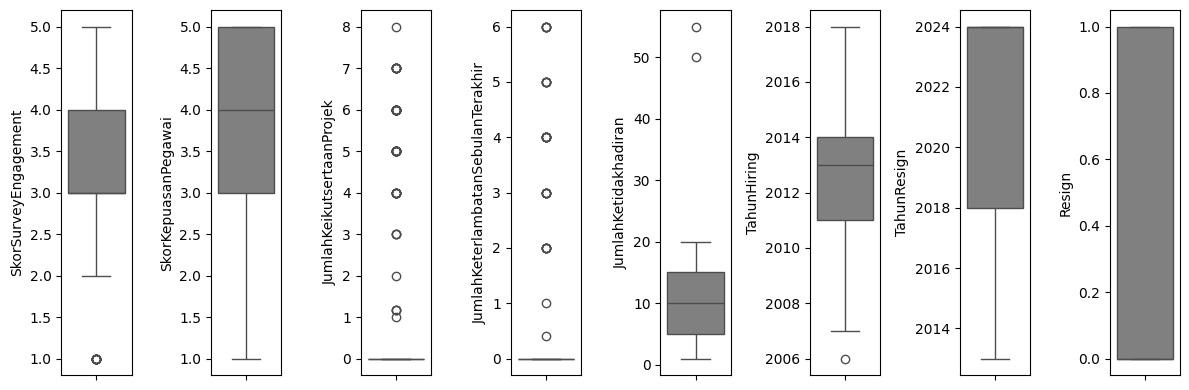

In [ ]:
#Cek Outliers menggunakan boxplot
plt.figure(figsize = (12, 4))
for i in range (0, len(nums)):
    plt.subplot (1, len(nums), i+1)
    sns.boxplot (y=df_prep[nums[i]], color='gray', orient='v')
    plt.tight_layout()

- Terdapat Outliers pada fitur ['SkorSurveyEngagement','JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran' ,'TahunHiring']
- Pada fitur Lama_bekerja terdapat nilai negatif, hal tersebut menandakan adanya data yang anomali

In [ ]:
# Filter Outlier
print(f'Jumlah baris sebelum memfilter outlier: {len(df_prep)}')

filtered_entries = np.array([True] * len(df_prep))
for col in nums:
    zscore = np.abs(stats.zscore(df_prep[col]))  # Menghitung absolute Z-score
    filtered_entries = filtered_entries & (zscore < 3)

df_prep = df_prep[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_prep)}')

Jumlah baris sebelum memfilter outlier: 287
Jumlah baris setelah memfilter outlier: 272


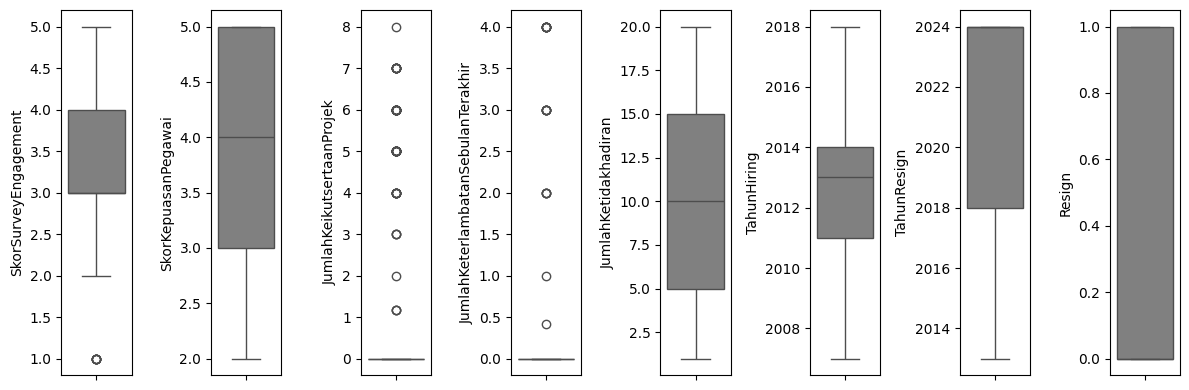

In [ ]:
#Cek Outliers setelah dilakukan handling menggunakan boxplot
plt.figure(figsize = (12, 4))
for i in range (0, len(nums)):
    plt.subplot (1, len(nums), i+1)
    sns.boxplot (y=df_prep[nums[i]], color='gray', orient='v')
    plt.tight_layout()

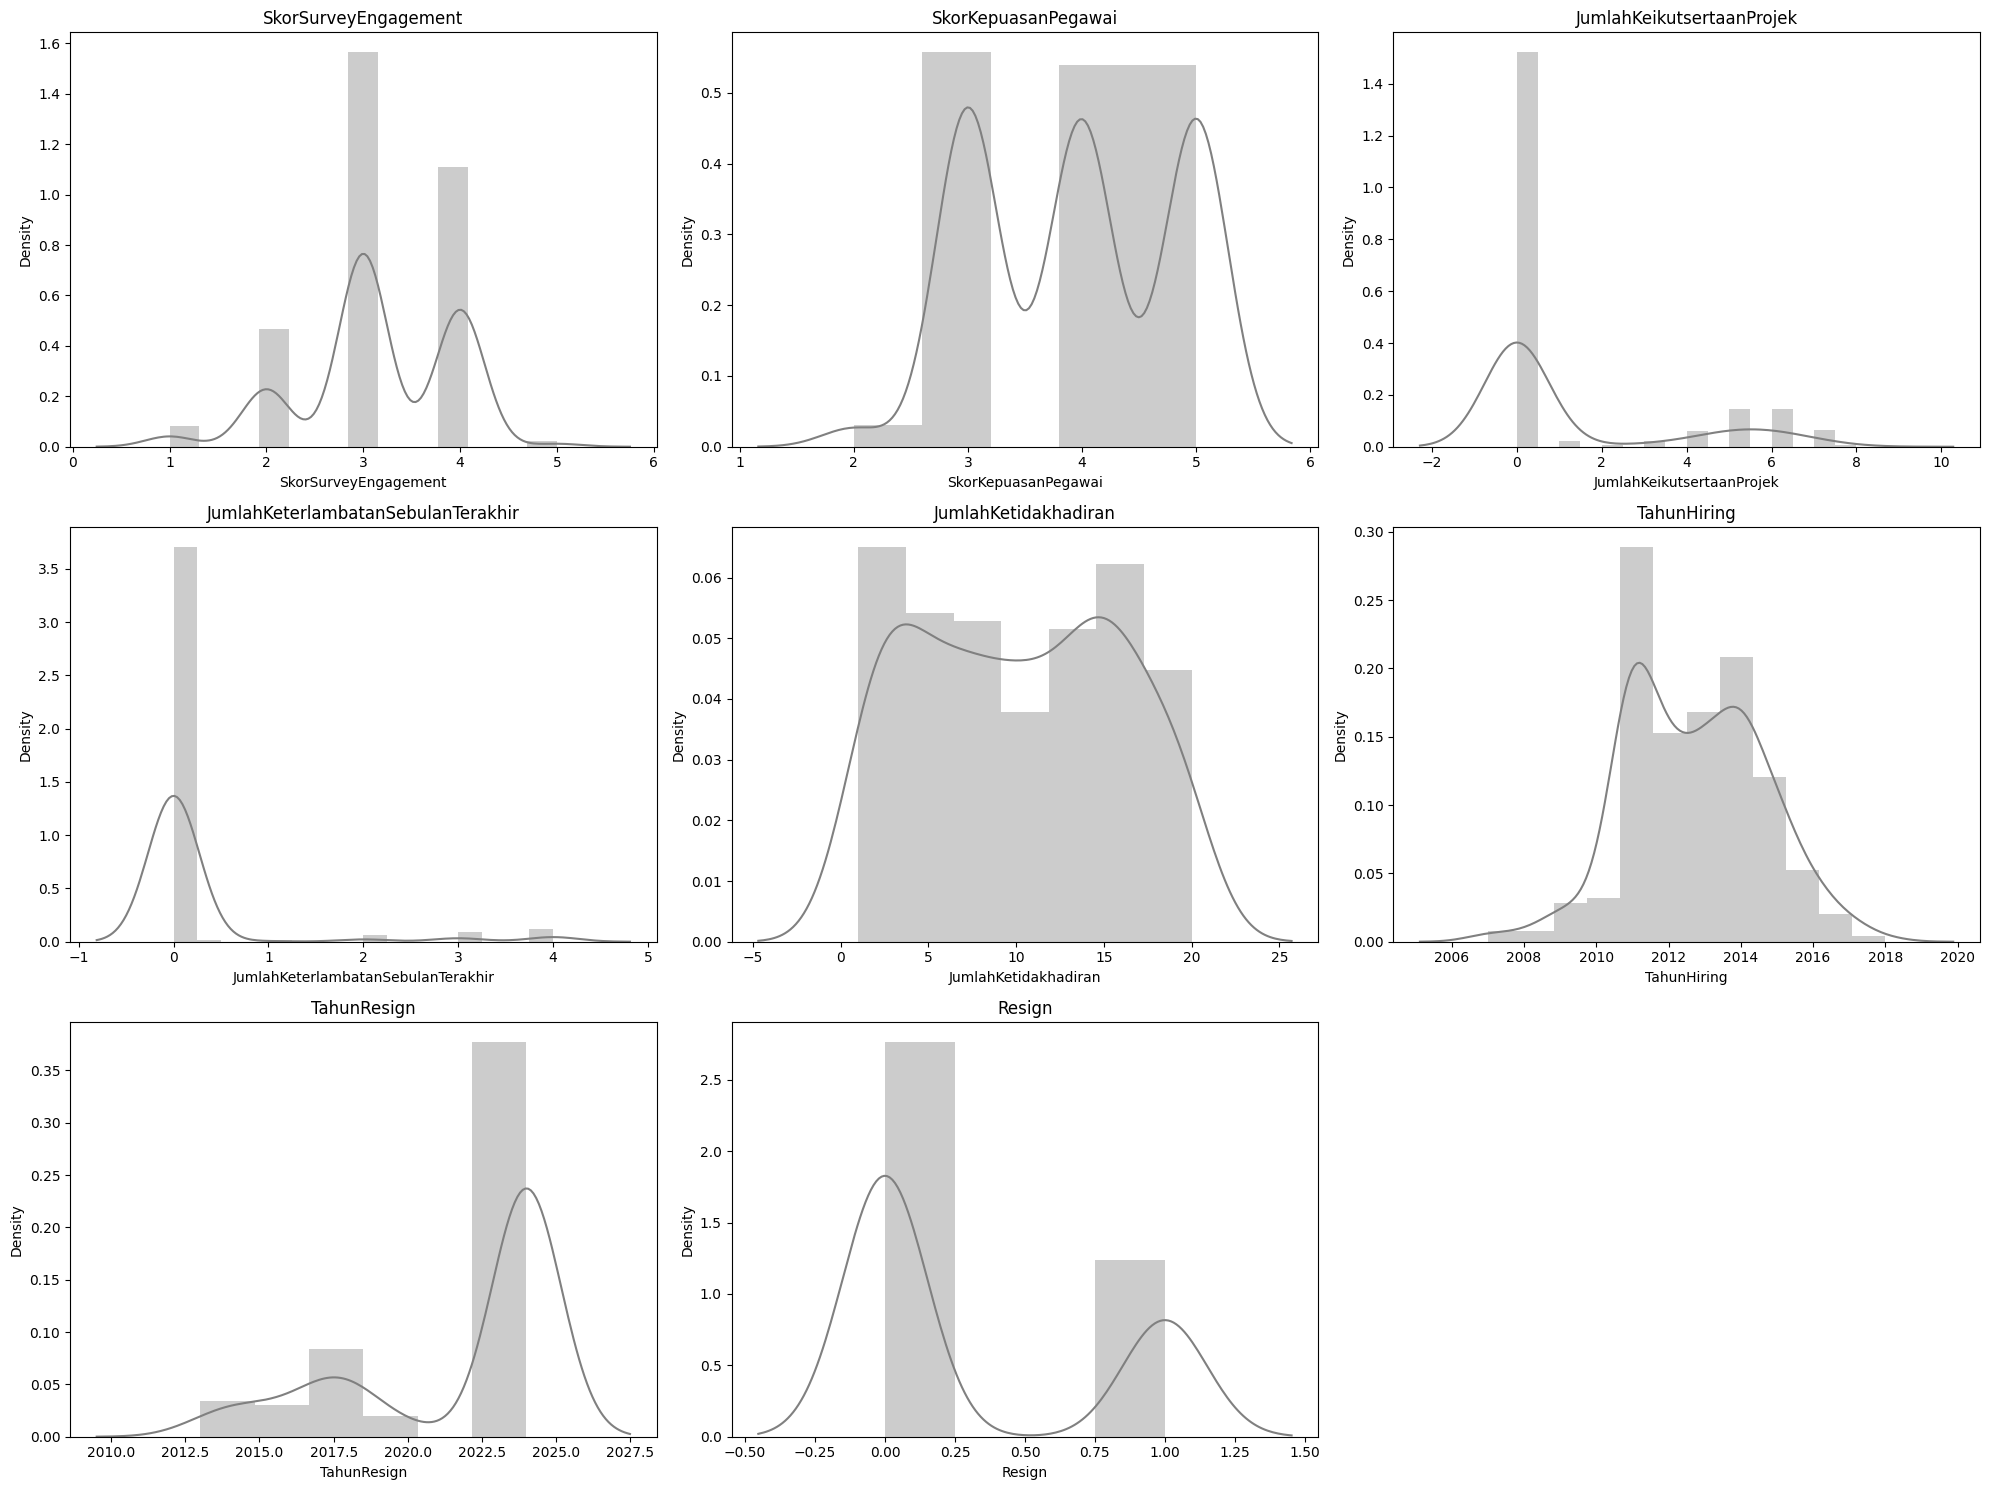

In [ ]:
# Buat figure dan axis untuk grid 3x3
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# Flatten axes array untuk iterasi yang lebih mudah
axes = axes.flatten()

# Loop melalui semua fitur numerik
for i in range(len(nums)):
    sns.distplot(df_prep[nums[i]], color='gray', ax=axes[i])
    axes[i].set_title(nums[i])

# Jika ada subplot yang tidak digunakan, hapus axis
for i in range(len(nums), len(axes)):
    fig.delaxes(axes[i])

# Menyesuaikan tata letak
plt.tight_layout()

# Menampilkan plot
plt.show()

In [ ]:
# Lakukan Normalisasi / Standarisasi
df_prep['SkorSurveyEngagement'] = StandardScaler().fit_transform(df_prep['SkorSurveyEngagement'].values.reshape(len(df_prep), 1))
df_prep['SkorKepuasanPegawai'] = StandardScaler().fit_transform(df_prep['SkorKepuasanPegawai'].values.reshape(len(df_prep), 1))
df_prep['JumlahKeikutsertaanProjek'] = StandardScaler().fit_transform(df_prep['JumlahKeikutsertaanProjek'].values.reshape(len(df_prep), 1))
df_prep['JumlahKeterlambatanSebulanTerakhir'] = StandardScaler().fit_transform(df_prep['JumlahKeterlambatanSebulanTerakhir'].values.reshape(len(df_prep), 1))
df_prep['JumlahKetidakhadiran'] = StandardScaler().fit_transform(df_prep['JumlahKetidakhadiran'].values.reshape(len(df_prep), 1))
df_prep['TahunHiring'] = StandardScaler().fit_transform(df_prep['TahunHiring'].values.reshape(len(df_prep), 1))
df_prep['TahunResign'] = StandardScaler().fit_transform(df_prep['TahunResign'].values.reshape(len(df_prep), 1))

In [ ]:
df_prep.describe()

SkorSurveyEngagement  SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
count          2.720000e+02         2.720000e+02               2.720000e+02   
mean           1.991871e-16         3.265362e-17              -6.857260e-17   
std            1.001843e+00         1.001843e+00               1.001843e+00   
min           -2.810856e+00        -2.283872e+00              -5.339286e-01   
25%           -2.103362e-01        -1.112923e+00              -5.339286e-01   
50%           -2.103362e-01         5.802533e-02              -5.339286e-01   
75%            1.089924e+00         1.228974e+00              -5.339286e-01   
max            2.390184e+00         1.228974e+00               2.908131e+00   

       JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran   TahunHiring  \
count                        2.720000e+02          2.720000e+02  2.720000e+02   
mean                        -4.571507e-17         -1.665335e-16 -2.089832e-14   
std                          1.001843e+00          1.001843e+00  1.001843e+00   
min                         -2.640052e-01         -1.571880e+00 -2.972155e+00   
25%                         -2.640052e-01         -8.844130e-01 -8.885824e-01   
50%                         -2.640052e-01         -2.507890e-02  1.532039e-01   
75%                         -2.640052e-01          8.342552e-01  6.740970e-01   
max                          4.570622e+00          1.693589e+00  2.757670e+00   

        TahunResign      Resign  
count  2.720000e+02  272.000000  
mean   2.629922e-14    0.308824  
std    1.001843e+00    0.462860  
min   -2.451438e+00    0.000000  
25%   -1.047076e+00    0.000000  
50%    6.381588e-01    0.000000  
75%    6.381588e-01    1.000000  
max    6.381588e-01    1.000000

In [ ]:
#Cek Fitur Categorical
cats = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'HiringPlatform', 'TingkatPendidikan', 'AlasanResign']

In [ ]:
df_prep[cats].describe()

StatusPernikahan JenisKelamin StatusKepegawaian  \
count               272          272               272   
unique                5            2                 3   
top       Belum_menikah       Wanita          FullTime   
freq                122          159               207   

                           Pekerjaan           JenjangKarir  \
count                            272                    272   
unique                            14                      3   
top     Software Engineer (Back End)  Freshgraduate_program   
freq                             104                    164   

       PerformancePegawai HiringPlatform TingkatPendidikan   AlasanResign  
count                 272            272               272            272  
unique                  5              9                 3             11  
top                 Biasa         Indeed           Sarjana  masih_bekerja  
freq                   80             80               168            188

## Feature Encoding

In [ ]:
df_fe = df_prep.copy()

In [ ]:
#Mapping StatusPernikahan menjadi 3 nilai Unique
status_mapping = {
    'Belum_menikah': 'Belum_menikah',
    'Menikah': 'Menikah',
    'Bercerai': 'Bercerai/Lainnya',
    'Lainnya': 'Bercerai/Lainnya',
    '-': 'Bercerai/Lainnya'
}

df_fe['StatusPernikahan'] = df_fe['StatusPernikahan'].map(status_mapping)

In [ ]:
pekerjaan_mapping = {
    'Software Engineer (Back End)' : 'Software Engineer',
    'Software Engineer (Front End)' : 'Software Engineer',
    'Software Engineer (UI & UX)' : 'Software Engineer',
    'Software Engineer (Android)' : 'Software Engineer',
    'Software Engineer (iOS)' : 'Software Engineer',
    'Software Architect' : 'Software Engineer',
    'Product Design (UI & UX)' : 'Product Design',
    'Product Design (UX Researcher)' : 'Product Design',
    'Data Analyst' : 'Data',
    'Data Engineer' : 'Data',
    'Product Manager' : 'Product Management',
    'Digital Product Manager' : 'Product Management',
    'Scrum Master' : 'Specialist Roles',
    'Machine Learning Engineer' : 'Specialist Roles',
    'DevOps Engineer' :'Specialist Roles'
}
df_fe['Pekerjaan'] = df_fe['Pekerjaan'].map(pekerjaan_mapping)

In [ ]:
hiring_mapping = {
    'Indeed' : 'Online Platform',
    'LinkedIn' : 'Online Platform',
    'CareerBuilder':'Online Platform',
    'Google_Search' : 'Online Platform',
    'Website' : 'Online Platform',
    'On-line_Web_apllication' : 'Online Platform',
    'Diversity_Job_Fair' : 'Offline Platform',
    'Employee_Referral' : 'Offline Platform',
    'Other' : 'Offline Platform'
}
df_fe['HiringPlatform'] = df_fe['HiringPlatform'].map(hiring_mapping)

In [ ]:
df_fe[cats].describe()

StatusPernikahan JenisKelamin StatusKepegawaian          Pekerjaan  \
count               272          272               272                272   
unique                3            2                 3                  5   
top       Belum_menikah       Wanita          FullTime  Software Engineer   
freq                122          159               207                196   

                 JenjangKarir PerformancePegawai   HiringPlatform  \
count                     272                272              271   
unique                      3                  5                2   
top     Freshgraduate_program              Biasa  Online Platform   
freq                      164                 80              219   

       TingkatPendidikan   AlasanResign  
count                272            272  
unique                 3             11  
top              Sarjana  masih_bekerja  
freq                 168            188

- Label Encoding digunakan untuk fitur JenisKelamin, JenjangKarir, PerformancePegawai, dan Tingkat Pendidikan
- One-Hot Encoding digunakan untuk fitur StatusPernikahan, StatusKepagawaian, Pekerjaan, HiringPlatform, dan AlasanResign

In [ ]:
#Feature Encoding Jenis Kelamin
mapping_jk = {
    'Wanita' : 0,
    'Pria' : 1
}
df_fe['JenisKelamin'] = df_fe['JenisKelamin'].map(mapping_jk)

In [ ]:
#Feature Encoding Jenjang Karir
mapping_jkr = {
    'Freshgraduate_program' : 0,
    'Mid_level' : 1,
    'Senior_level' : 2
}
df_fe['JenjangKarir'] = df_fe['JenjangKarir'].map(mapping_jkr)

In [ ]:
#Feature Encoding Performance Pegawai
mapping_pp = {
    'Sangat_kurang' : 0,
    'Kurang' : 1,
    'Biasa' : 2,
    'Bagus' : 3,
    'Sangat_bagus' : 4
}
df_fe['PerformancePegawai'] = df_fe['PerformancePegawai'].map(mapping_pp)

In [ ]:
#Feature Encoding Tingkat Pendidikan
mapping_tp = {
    'Sarjana' : 0,
    'Magister' : 1,
    'Doktor' : 2
}
df_fe['TingkatPendidikan'] = df_fe['TingkatPendidikan'].map(mapping_tp)

In [ ]:
df_fe

StatusPernikahan  JenisKelamin StatusKepegawaian           Pekerjaan  \
0       Belum_menikah             1         Outsource   Software Engineer   
1       Belum_menikah             1          FullTime                Data   
2             Menikah             1          FullTime   Software Engineer   
3       Belum_menikah             1         Outsource   Software Engineer   
4       Belum_menikah             0          FullTime  Product Management   
..                ...           ...               ...                 ...   
282     Belum_menikah             0          FullTime                Data   
283  Bercerai/Lainnya             0          FullTime      Product Design   
284           Menikah             0          FullTime   Software Engineer   
285     Belum_menikah             1          FullTime   Software Engineer   
286           Menikah             1        Internship                Data   

     JenjangKarir  PerformancePegawai    HiringPlatform  SkorSurveyEngagement  \
0               0                   4  Offline Platform              1.089924   
1               0                   0   Online Platform              1.089924   
2               0                   3   Online Platform              1.089924   
3               0                   3   Online Platform             -0.210336   
4               0                   3   Online Platform             -0.210336   
..            ...                 ...               ...                   ...   
282             1                   3   Online Platform             -1.510596   
283             0                   2   Online Platform              1.089924   
284             2                   2  Offline Platform             -1.510596   
285             1                   3   Online Platform              1.089924   
286             1                   3   Online Platform              1.089924   

     SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
0               0.058025                  -0.533929   
1               0.058025                   1.187101   
2              -1.112923                  -0.533929   
3              -1.112923                  -0.533929   
4              -1.112923                  -0.533929   
..                   ...                        ...   
282             1.228974                  -0.533929   
283             1.228974                  -0.533929   
284             1.228974                  -0.533929   
285             1.228974                  -0.533929   
286            -1.112923                  -0.533929   

     JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran  \
0                             -0.264005             -0.196946   
1                             -0.264005             -1.228147   
2                             -0.264005              0.146788   
3                              4.570622             -0.712546   
4                             -0.264005              0.146788   
..                                  ...                   ...   
282                           -0.264005              1.006122   
283                           -0.264005              0.146788   
284                           -0.264005              1.177989   
285                           -0.264005              1.693589   
286                           -0.264005             -1.400013   

     TingkatPendidikan     AlasanResign  TahunHiring  TahunResign  Resign  
0                    1    masih_bekerja    -0.888582     0.638159       0  
1                    0    toxic_culture     0.674097    -1.047076       1  
2                    1        jam_kerja    -0.888582    -2.170566       1  
3                    0    masih_bekerja     0.674097     0.638159       0  
4                    0      ganti_karir     0.153204    -1.047076       1  
..                 ...              ...          ...          ...     ...  
282                  0    masih_bekerja    -0.888582     0.638159       0  
283                  0        jam_kerja     0.153204    -

In [ ]:
#Lakukan Feature Encoding untuk Wilayah dan Category menggunakan One-Hot Encoding
df_fe = pd.get_dummies(df_fe, columns=['StatusPernikahan'])
df_fe = pd.get_dummies(df_fe, columns=['StatusKepegawaian'])
df_fe = pd.get_dummies(df_fe, columns=['Pekerjaan'])
df_fe = pd.get_dummies(df_fe, columns=['HiringPlatform'])
df_fe = pd.get_dummies(df_fe, columns=['AlasanResign'])

In [ ]:
# Konversi semua kolom boolean menjadi integer
bool_columns = df_fe.select_dtypes(include=['bool']).columns
df_fe[bool_columns] = df_fe[bool_columns].astype(int)

In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 0 to 286
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   JenisKelamin                           272 non-null    int64  
 1   JenjangKarir                           272 non-null    int64  
 2   PerformancePegawai                     272 non-null    int64  
 3   SkorSurveyEngagement                   272 non-null    float64
 4   SkorKepuasanPegawai                    272 non-null    float64
 5   JumlahKeikutsertaanProjek              272 non-null    float64
 6   JumlahKeterlambatanSebulanTerakhir     272 non-null    float64
 7   JumlahKetidakhadiran                   272 non-null    float64
 8   TingkatPendidikan                      272 non-null    int64  
 9   TahunHiring                            272 non-null    float64
 10  TahunResign                            272 non-null    float64
 11  Resign     

In [ ]:
df_fe['Resign'] = df_fe.pop('Resign')

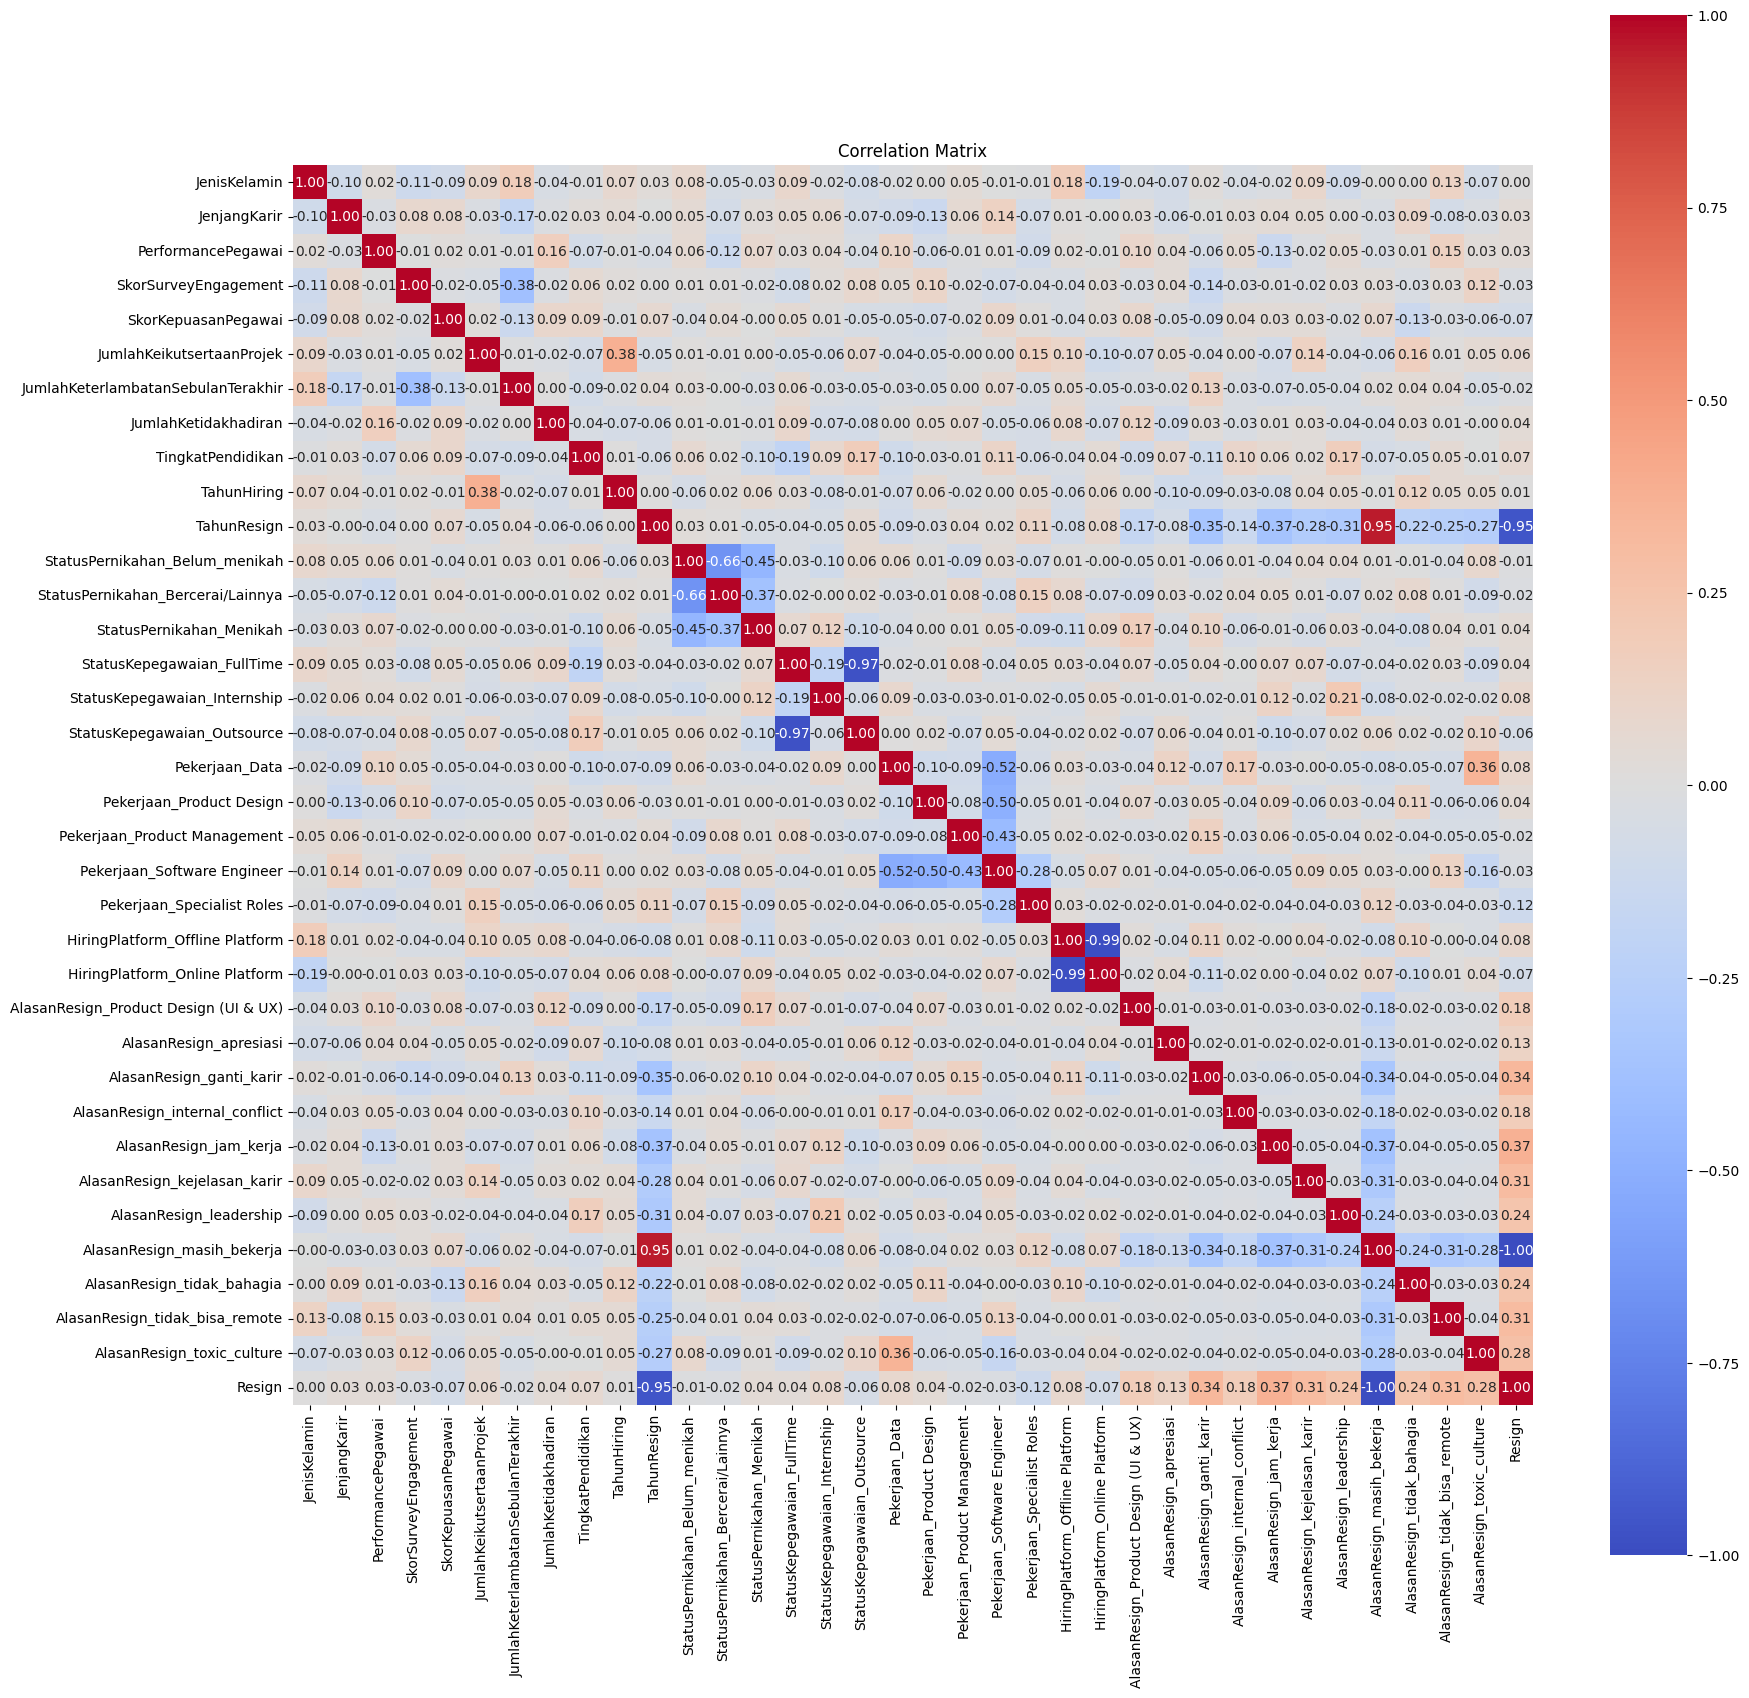

In [ ]:
# Menghitung matriks korelasi
corr_matrix = df_fe.corr()

# Menampilkan matriks korelasi menggunakan seaborn heatmap
plt.figure(figsize=(20, 20))  # Ukuran plot disesuaikan
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Identifikasi korelasi tinggi
threshold = 0.9
high_corr_var = np.where(np.abs(corr_matrix) > threshold)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y])
                 for x, y in zip(*high_corr_var) if x != y and x < y]

print("Fitur-fitur dengan korelasi tinggi (di atas 0.9):")
print(high_corr_var)

Fitur-fitur dengan korelasi tinggi (di atas 0.9):
[('TahunResign', 'AlasanResign_masih_bekerja'), ('TahunResign', 'Resign'), ('StatusKepegawaian_FullTime', 'StatusKepegawaian_Outsource'), ('HiringPlatform_Offline Platform', 'HiringPlatform_Online Platform'), ('AlasanResign_masih_bekerja', 'Resign')]


- Berdasarkan hasil dari analisis correlation matrix diatas, maka fitur-fitur yang memiliki korelasi tinggi dan redundan akan di drop
- TahunResign, AlasanResign_masih_bekerja, StatusKepegawaian_Outsource, dan HiringPlatform_Offline Platform

In [ ]:
df_fe.drop(columns = ['TahunResign','AlasanResign_masih_bekerja', 'StatusKepegawaian_FullTime','HiringPlatform_Offline Platform'], inplace = True)

In [ ]:
df_fe.drop(columns=['StatusPernikahan_Bercerai/Lainnya', 'Pekerjaan_Data','AlasanResign_Product Design (UI & UX)'], inplace = True)

In [ ]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 272 entries, 0 to 286
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   JenisKelamin                        272 non-null    int64  
 1   JenjangKarir                        272 non-null    int64  
 2   PerformancePegawai                  272 non-null    int64  
 3   SkorSurveyEngagement                272 non-null    float64
 4   SkorKepuasanPegawai                 272 non-null    float64
 5   JumlahKeikutsertaanProjek           272 non-null    float64
 6   JumlahKeterlambatanSebulanTerakhir  272 non-null    float64
 7   JumlahKetidakhadiran                272 non-null    float64
 8   TingkatPendidikan                   272 non-null    int64  
 9   TahunHiring                         272 non-null    float64
 10  StatusPernikahan_Belum_menikah      272 non-null    int64  
 11  StatusPernikahan_Menikah            272 non-null  

### Oversampling

In [ ]:
df_model = df_fe.copy()

In [ ]:
X = df_model.drop(columns=["Resign"])
y = df_model['Resign']

In [ ]:
# Membagi data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((190, 28), (82, 28), (190,), (82,))

In [ ]:
# Lakukan oversampling menggunakan SMOTE pada training set
smote = SMOTE(random_state=42)

# versi 1 dengan CatAnIncome
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
# Print formatted comparison
print("Data Distribution Before Oversampling:")
print(f"  Total samples: {len(df_prep)}")
print(f"  Count (Resign = 0): {y.value_counts()[0]}")
print(f"  Count (Resign = 1): {y.value_counts()[1]}")

print("Data Distribution After Oversampling:")
print(f"  Total samples: {len(X_train_resampled)}")
print(f"  Count (Resign = 0): {y_train_resampled.value_counts()[0]}")
print(f"  Count (Resign = 1): {y_train_resampled.value_counts()[1]}")

Data Distribution Before Oversampling:
  Total samples: 272
  Count (Resign = 0): 188
  Count (Resign = 1): 84
Data Distribution After Oversampling:
  Total samples: 272
  Count (Resign = 0): 136
  Count (Resign = 1): 136


In [ ]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#vif_data = pd.DataFrame()
#vif_data["feature"] = X_resampled.columns
#vif_data["VIF"] = [vif(X_resampled, i)
#                    for i in range(len(X_resampled.columns))]
#vif_data

- Dari hasil VIF Checking terdapat fitur dengan nilai VIF yang tinggi, yaitu fitur SkorSurveyEngagement, SkorKepuasanPegawai, TahunHiring, Pekerjaan_Software Engineer
- Fitur tersebut akan di drop untuk dikorbankan

In [ ]:
# Membuang Fitur dari hasil VIF Checking
#X_resampled = X_resampled.drop(columns=['Pekerjaan_Software Engineer'])
#X_resampled = X_resampled.drop(columns=[ 'SkorSurveyEngagement','SkorKepuasanPegawai', 'TahunHiring','Pekerjaan_Software Engineer'])

In [ ]:
#vif_data = pd.DataFrame()
#vif_data["feature"] = X_resampled.columns
#vif_data["VIF"] = [vif(X_resampled, i)
 #                   for i in range(len(X_resampled.columns))]
#vif_data

- Sudah tidak ada fitur yang memiliki multicolinearity yang tinggi

# Modeling

In [ ]:
# split data train dan data test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

((190, 31), (82, 31), (190,), (82,))

In [ ]:
# evaluasi model
#def eval_classification(model):
#    y_pred = model.predict(X_test)
#    y_pred_train = model.predict(X_train)
#    y_pred_proba = model.predict_proba(X_test)
#    y_pred_proba_train = model.predict_proba(X_train)

#    #Dilakukan tuning F1 dengan menghilangkan perhitungan recall
#    print("Accuracy (Test Set): %.4f" % accuracy_score(y_test, y_pred))
#    print("Precision (Test Set): %.4f" % precision_score(y_test, y_pred))
#    print("F1-Score (Test Set): %.4f" % f1_score(y_test, y_pred))
#    print("ROC AUC (Train-proba): %.4f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#    print("ROC AUC (Test-proba): %.4f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    # Cross-validation dengan precision sebagai metrik
#    score = cross_validate(model, X_train_resampled, y_train_resampled, cv=5, scoring='precision', return_train_score=True)
#    print('Precision (crossval train): '+ str(score['train_score'].mean()))
#    print('Precision (crossval test): '+ str(score['test_score'].mean()))

Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        52
           1       0.73      0.90      0.81        30

    accuracy                           0.84        82
   macro avg       0.83      0.85      0.84        82
weighted avg       0.86      0.84      0.84        82



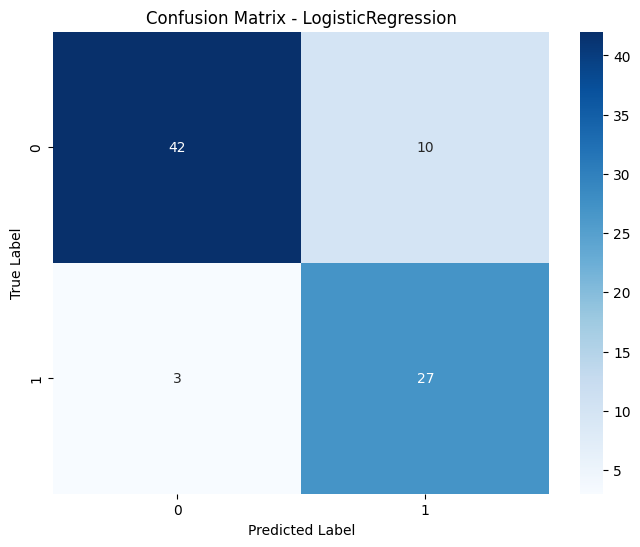

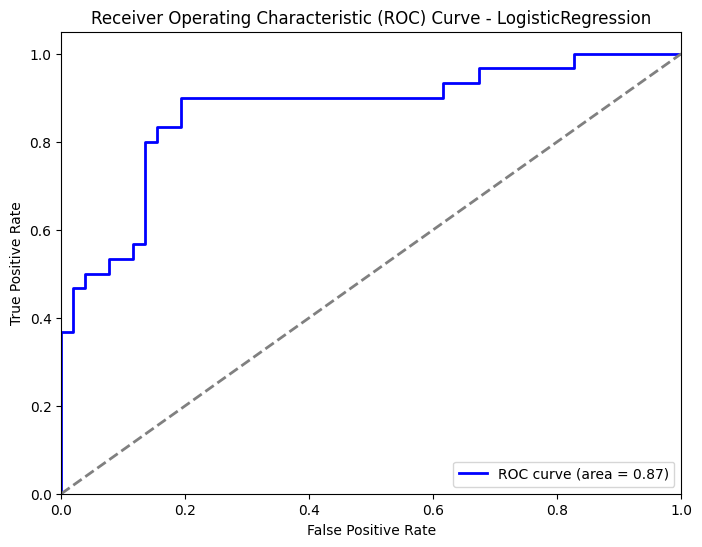

Model: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.78      0.77      0.78        52
           1       0.61      0.63      0.62        30

    accuracy                           0.72        82
   macro avg       0.70      0.70      0.70        82
weighted avg       0.72      0.72      0.72        82



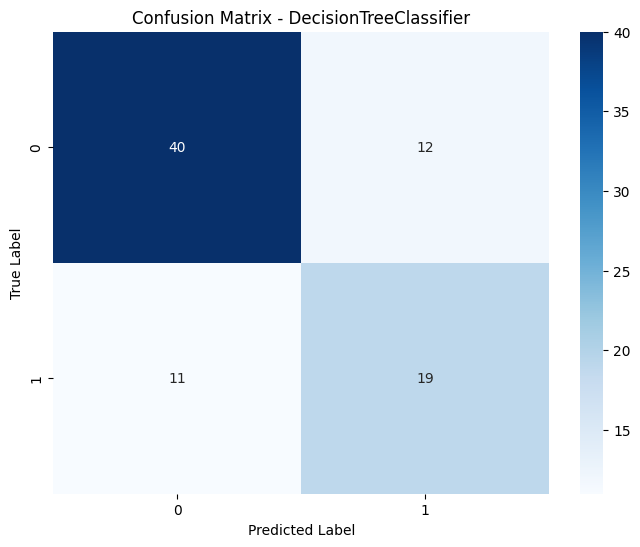

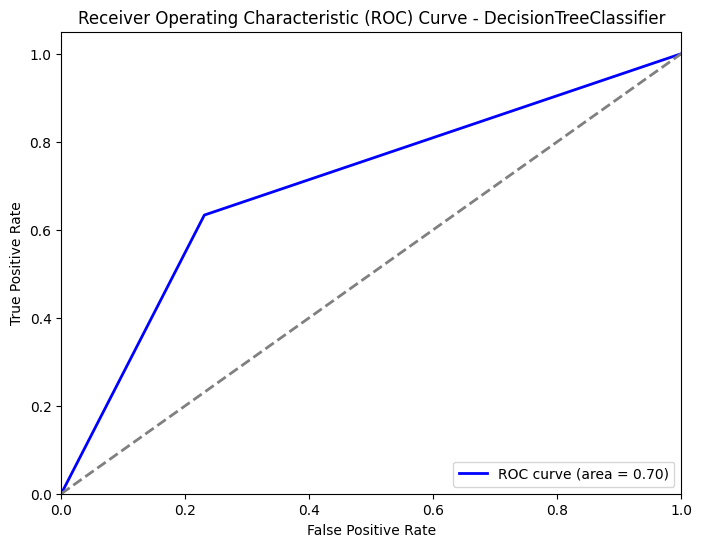

Model: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.75      0.85      0.79        52
           1       0.65      0.50      0.57        30

    accuracy                           0.72        82
   macro avg       0.70      0.67      0.68        82
weighted avg       0.71      0.72      0.71        82



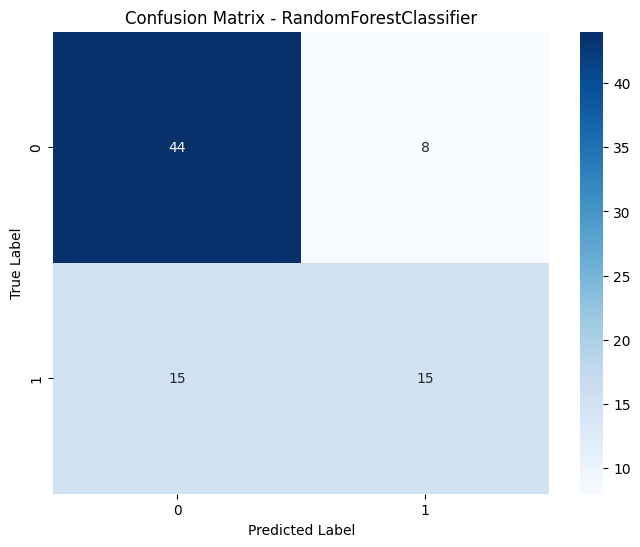

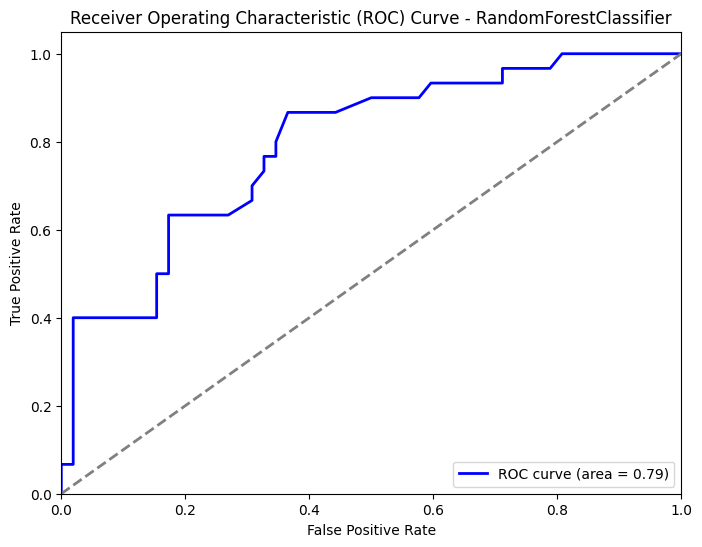

Model: GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        52
           1       0.89      0.83      0.86        30

    accuracy                           0.90        82
   macro avg       0.90      0.89      0.89        82
weighted avg       0.90      0.90      0.90        82



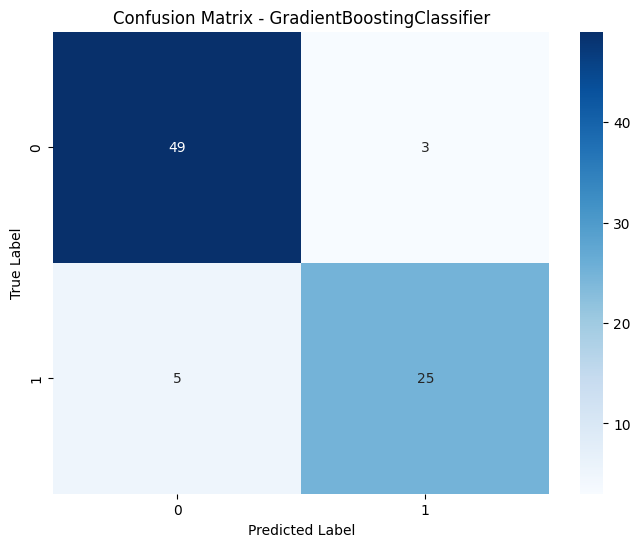

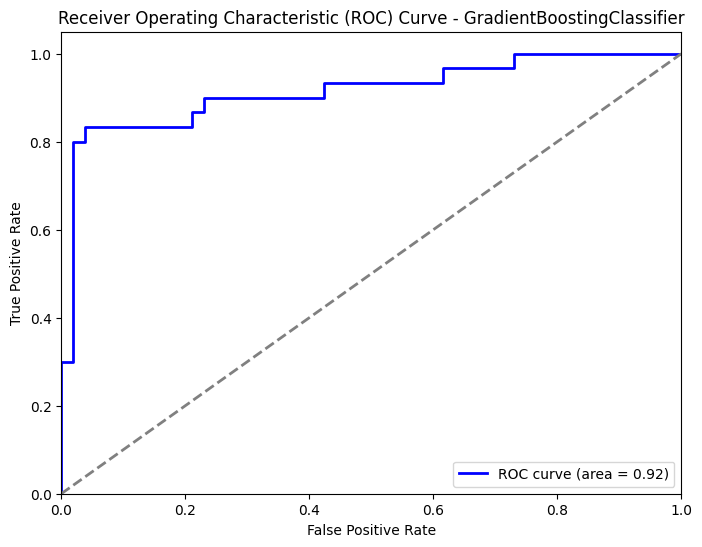

In [ ]:
# Fungsi untuk melatih dan mengevaluasi model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"Model: {model.__class__.__name__}")
    print(classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model.__class__.__name__}')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model.__class__.__name__}')
    plt.legend(loc="lower right")
    plt.show()

# Membuat daftar model
models = [
    LogisticRegression(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]

# Mengevaluasi setiap model
for model in models:
    evaluate_model(model, X_train_resampled, y_train_resampled, X_test, y_test)

In [ ]:
# Melihat feature Importance dari hasil Gradient Boosting
feature_importance = model.feature_importances_

In [ ]:
# Mengambil nama kolom dari DataFrame X_df
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

In [ ]:
# Menampilkan feature importance
print(importance_df.sort_values(by='Importance', ascending=False))

                               Feature  Importance
4                  SkorKepuasanPegawai    0.101490
22              AlasanResign_jam_kerja    0.097800
26      AlasanResign_tidak_bisa_remote    0.076251
23        AlasanResign_kejelasan_karir    0.074506
9                          TahunHiring    0.068049
0                         JenisKelamin    0.063420
3                 SkorSurveyEngagement    0.062224
20            AlasanResign_ganti_karir    0.055716
27          AlasanResign_toxic_culture    0.051418
16         Pekerjaan_Software Engineer    0.051317
13         StatusKepegawaian_Outsource    0.047960
5            JumlahKeikutsertaanProjek    0.042870
7                 JumlahKetidakhadiran    0.036910
24             AlasanResign_leadership    0.025908
18      HiringPlatform_Online Platform    0.024146
11            StatusPernikahan_Menikah    0.020883
2                   PerformancePegawai    0.018718
25          AlasanResign_tidak_bahagia    0.016426
17          Pekerjaan_Specialis

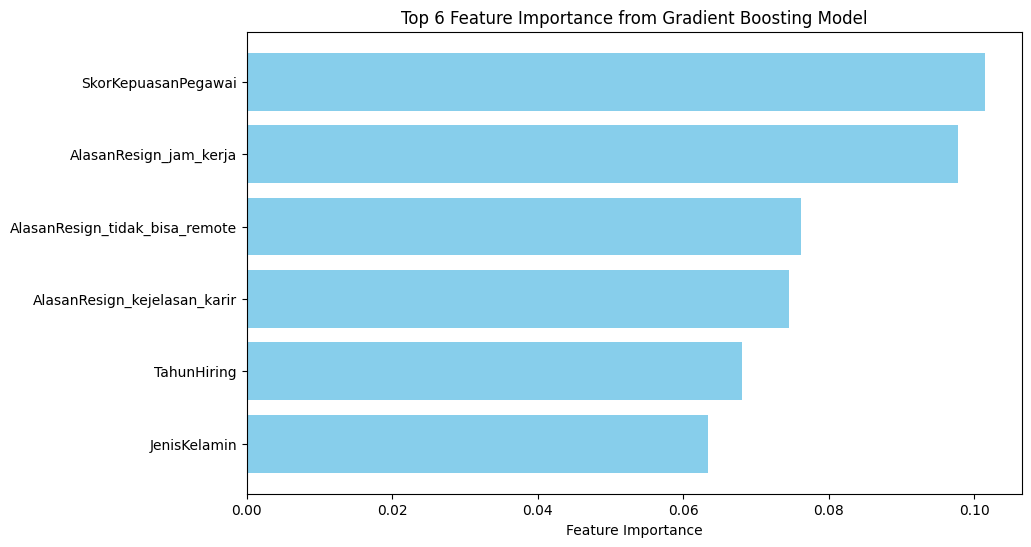

In [ ]:
# Mengambil 6 fitur teratas
top_6_features = importance_df.head(6)

# Visualisasi feature importance 6 teratas
plt.figure(figsize=(10, 6))
plt.barh(top_6_features['Feature'], top_6_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 6 Feature Importance from Gradient Boosting Model')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
pip install --upgrade scikit-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


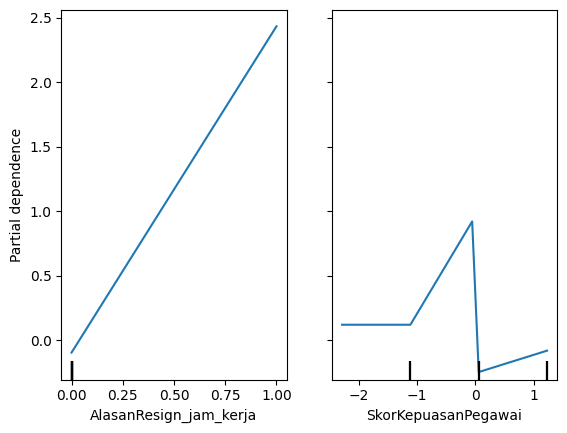

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
# Tentukan fitur yang ingin Anda plot
features_to_plot = ['AlasanResign_jam_kerja', 'SkorKepuasanPegawai']

# Membuat dan menampilkan Partial Dependence Plot
PartialDependenceDisplay.from_estimator(model, X, features_to_plot)
plt.show()

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=fa927da2d65e33b3ca00db6216c70ae988d348d23a42a18e1b88ea9c980d0310
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['0', '1'], discretize_continuous=True)
i = 25
exp = explainer.explain_instance(X_train.values[i], model.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)